<h1><strong>Coppel</strong><br /><strong>Coupon Challenge!</strong></h1>
<blockquote><p>Your mission, Mr Phelps, should you choose to accept it,...</p> <footer>Mission Impossible</footer><blockquote>


<hr>
<h2>Contexto</h2>
<p>El marketing de descuento y el uso de cupones son técnicas promocionales muy utilizadas para atraer nuevos clientes, retener y mantener/mejorar la lealtad de los clientes existentes. La medición de la propensión de un consumidor al uso de cupones y la predicción del comportamiento de canje son parámetros cruciales para evaluar la efectividad de una campaña de marketing.</p>

<p>Las campañas promocionales se envían a través de varios canales, incluidos correos electrónicos, notificaciones, etc. Varias de estas campañas incluyen cupones de descuento que se ofrecen para un producto/gama de productos específicos. Coppel quiere predecir si los clientes canjean los cupones recibidos en todos los canales, lo que permitirá al equipo de marketing de Coppels diseñar con precisión la construcción de cupones y desarrollar estrategias de marketing más precisas y específicas.</p>

La data disponible para este challenge contine la siguiente información:
<ol>
    <li>Detalles demográficos del usuario</li>
    <li>Detalles de la campaña y el cupón</li>
    <li>Detalles del producto</li>
    <li>Transacciones previas</li>
</ol><br>

<p>Acá tienes el modelo entidad-relación de la data:</p><br>
<img src="data/Schema.png" alt="Entity Relationship diagram" width="70%" height="70%" />
<h2>La misión</h2><br>
Con base en los datos de rendimiento y transacciones anteriores de las últimas 18 campañas, prediga la probabilidad de las próximas 10 campañas en el conjunto de prueba para cada combinación de cupón y cliente, ya sea que el cliente canjee el cupón o no.

<hr>

<h2>Instrucciones</h2>
<p>Aquí hay algunas directrices que me gustaría que tuvieras en mente:</p>
<ul>
    <li>Por favor crea primero una branch usando tu nombre de pila como nombre del branch y trabaja ahí. Este branch lo vas a subir al repo de github y yo lo voy a bajar.</li>
    <li>Usa Python v3.x</li>
    <li>Puedes usar la librería, framework o cualquier otra herramienta que necesites y que puedas importar en este jupyter notebook</li>
</ul>
<p>Como todo proyecto de ciencia de datos siempre hay pasos comúnes que se llevan a cabo y aunque esots pueden omitirse o intercambiarse, <b>qué es lo que espero ver?</b></p>
<ol>
    <li>La forma con la que trabajas y analizas la data</li>
    <li>La forma en la que seleccionas y generas nuevas variables</li>
    <li>La manera en la que implementas en el modelo</li>
    <li>De que forma entrenas el modelo</li>
    <li>La manera en la que pruebas y evalúas el modelo</li>    
</ol>
<br>
<h2>Deadline!</h2>
Tienes 7 días para realizar el reto (si, los fines de semana cuentan), Si embargo no te stresses demasiado quiero que en este ejercicio me muestres  como abordarías un proyecto de ciencia de datos que te asigne y espero (confío) en que vas a hacerlo por ti mism@ ya que  en la vida real no vas a tener a tu amig@ en la reuniones para que responda por tí. AL finalizar el proyecto ya sea antes o a los 7 días nos reuniremos para que me presentes tu solución


<blockquote><p>As always, should you or any of your IM Force be caught or killed, the Secretary will disavow any knowledge of your actions. This jupyter notebook will self-destruct in 1 week. Good luck,</p> <footer>—Mission Impossible</footer><blockquote>


Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics

### Lectura y Limpieza de Datos

In [2]:
# Importar data: customer_transaction_data
customer_transaction_data = pd.read_csv("customer_transaction_data.csv")
customer_transaction_data

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
...,...,...,...,...,...,...,...
1324561,2013-06-30,1129,2777,1,284.60,-71.24,0.0
1324562,2013-06-30,1129,2953,4,42.74,-28.50,0.0
1324563,2013-06-30,1129,2971,6,64.12,-42.74,0.0
1324564,2013-06-30,1129,46984,1,95.82,0.00,0.0


In [3]:
# Min and Max customer_id
print(min(customer_transaction_data.customer_id))
print(max(customer_transaction_data.customer_id))

1
1582


In [4]:
# Seleccionar columnas importantes
customer_transaction_data=customer_transaction_data.drop(['item_id','other_discount'], axis = 1)
customer_transaction_data.columns

Index(['date', 'customer_id', 'quantity', 'selling_price', 'coupon_discount'], dtype='object')

In [5]:
# Agrupar por customer id
customer_transaction_data = customer_transaction_data.groupby('customer_id').sum()
print(customer_transaction_data)

             quantity  selling_price  coupon_discount
customer_id                                          
1                1227       98513.93         -2116.83
2                 474       43100.03          -249.34
3                8163       73050.27         -2179.54
4                 280       33973.22           -89.05
5               93353      103615.10           -90.83
...               ...            ...              ...
1578           107107       82019.46          -767.62
1579             1756      146358.89          -338.39
1580            20467       59426.10             0.00
1581           142571       57532.24             0.00
1582           183659      117931.44         -2315.96

[1582 rows x 3 columns]


In [6]:
# Resetear los index
customer_transaction_data=customer_transaction_data.reset_index()

In [7]:
# Imprimir datos
customer_transaction_data

,customer_id,quantity,selling_price,coupon_discount
0,1,1227,98513.93,-2116.83
1,2,474,43100.03,-249.34
2,3,8163,73050.27,-2179.54
3,4,280,33973.22,-89.05
4,5,93353,103615.10,-90.83
...,...,...,...,...
1577,1578,107107,82019.46,-767.62
1578,1579,1756,146358.89,-338.39
1579,1580,20467,59426.10,0.00
1580,1581,142571,57532.24,0.00


In [8]:
# Importar data: train
train = pd.read_csv("train.csv")
train

,train_id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0
...,...,...,...,...,...
78364,128587,8,71,1523,0
78365,128589,30,547,937,0
78366,128590,8,754,1004,0
78367,128592,13,134,71,0


In [9]:
# Agrupar pot customer id
train = train.groupby('customer_id').sum()
print(train)

             train_id  campaign_id  coupon_id  redemption_status
customer_id                                                     
1             5896072         1595      52990                  2
3             2394854          431      21499                  0
4             1477496          184      11431                  0
5             3456347          538      30403                  0
6             2039301          302      18146                  0
...               ...          ...        ...                ...
1578          1930294          373      15539                  2
1579          3236026          452      24556                  0
1580          2740885          419      23909                  0
1581          1187320          168       8997                  0
1582          4382168          739      38388                  2

[1428 rows x 4 columns]


In [10]:
# Resetear index
train=train.reset_index()

In [11]:
# Imprimir datos
train

,customer_id,train_id,campaign_id,coupon_id,redemption_status
0,1,5896072,1595,52990,2
1,3,2394854,431,21499,0
2,4,1477496,184,11431,0
3,5,3456347,538,30403,0
4,6,2039301,302,18146,0
...,...,...,...,...,...
1423,1578,1930294,373,15539,2
1424,1579,3236026,452,24556,0
1425,1580,2740885,419,23909,0
1426,1581,1187320,168,8997,0


In [12]:
# Seleccionar variables importantes
train=train.drop(['train_id','campaign_id','coupon_id'], axis = 1)
train.columns

Index(['customer_id', 'redemption_status'], dtype='object')

In [14]:
# Imprimir data
train

,customer_id,redemption_status
0,1,2
1,3,0
2,4,0
3,5,0
4,6,0
...,...,...
1423,1578,2
1424,1579,0
1425,1580,0
1426,1581,0


In [15]:
# Min and Max customer_id
print(min(train.customer_id))
print(max(train.customer_id))

1
1582


In [16]:
# Hacer un merge de customer_transaction_data y train data con el customer id.
data1 = pd.merge(customer_transaction_data, train,how="inner", on=["customer_id"])
data1

,customer_id,quantity,selling_price,coupon_discount,redemption_status
0,1,1227,98513.93,-2116.83,2
1,3,8163,73050.27,-2179.54,0
2,4,280,33973.22,-89.05,0
3,5,93353,103615.10,-90.83,0
4,6,707,59508.22,-409.62,0
...,...,...,...,...,...
1423,1578,107107,82019.46,-767.62,2
1424,1579,1756,146358.89,-338.39,0
1425,1580,20467,59426.10,0.00,0
1426,1581,142571,57532.24,0.00,0


In [17]:
# Min and Max redemption_status
print(min(data1.redemption_status))
print(max(data1.redemption_status))

0
17


In [18]:
# Renombrar columna
data1 = data1.rename(columns={'redemption_status':'total_coupon_used'})
data1.columns

Index(['customer_id', 'quantity', 'selling_price', 'coupon_discount',
       'total_coupon_used'],
      dtype='object')

In [19]:
# Imprimir datos
data1

,customer_id,quantity,selling_price,coupon_discount,total_coupon_used
0,1,1227,98513.93,-2116.83,2
1,3,8163,73050.27,-2179.54,0
2,4,280,33973.22,-89.05,0
3,5,93353,103615.10,-90.83,0
4,6,707,59508.22,-409.62,0
...,...,...,...,...,...
1423,1578,107107,82019.46,-767.62,2
1424,1579,1756,146358.89,-338.39,0
1425,1580,20467,59426.10,0.00,0
1426,1581,142571,57532.24,0.00,0


In [20]:
# Crear columna redemption_status
data1['redemption_status']= [0 if s == 0 else 1 for s in data1['total_coupon_used']]
data1

,customer_id,quantity,selling_price,coupon_discount,total_coupon_used,redemption_status
0,1,1227,98513.93,-2116.83,2,1
1,3,8163,73050.27,-2179.54,0,0
2,4,280,33973.22,-89.05,0,0
3,5,93353,103615.10,-90.83,0,0
4,6,707,59508.22,-409.62,0,0
...,...,...,...,...,...,...
1423,1578,107107,82019.46,-767.62,2,1
1424,1579,1756,146358.89,-338.39,0,0
1425,1580,20467,59426.10,0.00,0,0
1426,1581,142571,57532.24,0.00,0,0


In [21]:
# Tipo de dato
data1.dtypes

customer_id            int64
quantity               int64
selling_price        float64
coupon_discount      float64
total_coupon_used      int64
redemption_status      int64
dtype: object

In [22]:
# Importar data: customer_demographics
customer_demographics = pd.read_csv("customer_demographics.csv")
customer_demographics

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5
...,...,...,...,...,...,...,...
755,1577,36-45,NaN,0,2,NaN,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,NaN,0,1,NaN,4
758,1580,26-35,NaN,0,2,NaN,5


In [23]:
# Reemplazar NaN en marital_status y no_of_children
customer_demographics = customer_demographics.fillna({'no_of_children': 0, 'marital_status': 'No. Info'})
customer_demographics

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,0,4
1,6,46-55,Married,0,2,0,5
2,7,26-35,No. Info,0,3,1,3
3,8,26-35,No. Info,0,4,2,6
4,10,46-55,Single,0,1,0,5
...,...,...,...,...,...,...,...
755,1577,36-45,No. Info,0,2,0,5
756,1578,46-55,Married,0,3,1,6
757,1579,46-55,No. Info,0,1,0,4
758,1580,26-35,No. Info,0,2,0,5


In [24]:
# Confirmar NaN
customer_demographics.isnull().sum()

customer_id       0
age_range         0
marital_status    0
rented            0
family_size       0
no_of_children    0
income_bracket    0
dtype: int64

In [25]:
# Hacer un merge de customer_demographics y data1 data con el customer id.
data2 = pd.merge(customer_demographics, data1,how="inner", on=["customer_id"])
data2

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,redemption_status
0,1,70+,Married,0,2,0,4,1227,98513.93,-2116.83,2,1
1,6,46-55,Married,0,2,0,5,707,59508.22,-409.62,0,0
2,7,26-35,No. Info,0,3,1,3,57763,107477.03,-785.43,1,1
3,8,26-35,No. Info,0,4,2,6,1334454,299482.15,-6605.29,8,1
4,10,46-55,Single,0,1,0,5,81165,50960.30,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
698,1574,36-45,Married,0,2,0,5,155276,243618.73,-11937.80,17,1
699,1578,46-55,Married,0,3,1,6,107107,82019.46,-767.62,2,1
700,1579,46-55,No. Info,0,1,0,4,1756,146358.89,-338.39,0,0
701,1580,26-35,No. Info,0,2,0,5,20467,59426.10,0.00,0,0


In [26]:
# Verificar valores NaN
data2.isnull().sum()

customer_id          0
age_range            0
marital_status       0
rented               0
family_size          0
no_of_children       0
income_bracket       0
quantity             0
selling_price        0
coupon_discount      0
total_coupon_used    0
redemption_status    0
dtype: int64

In [27]:
# Tipo de dato
data2.dtypes

customer_id            int64
age_range             object
marital_status        object
rented                 int64
family_size           object
no_of_children        object
income_bracket         int64
quantity               int64
selling_price        float64
coupon_discount      float64
total_coupon_used      int64
redemption_status      int64
dtype: object

### Exploración y Análisis de los Datos

<AxesSubplot:>

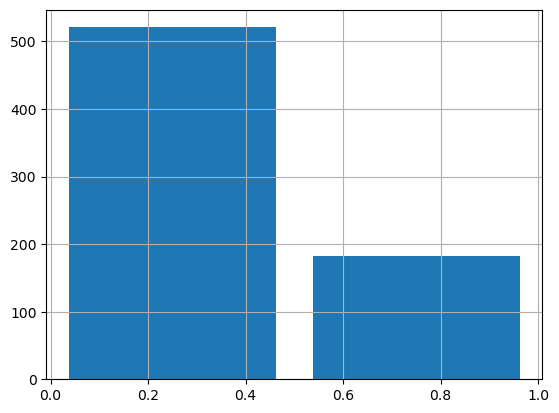

In [28]:
# Histograma de la variable Objetivo = redemption_status
data2["redemption_status"].hist(bins=2, rwidth=0.85,)

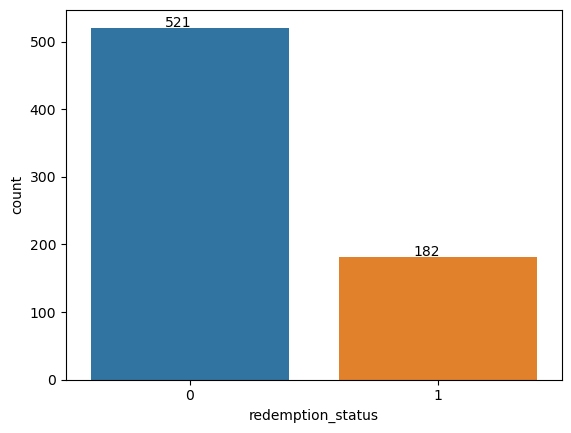

In [29]:
# redemption_status countplot
ax = sns.countplot(x = "redemption_status", data = data2)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1.5))

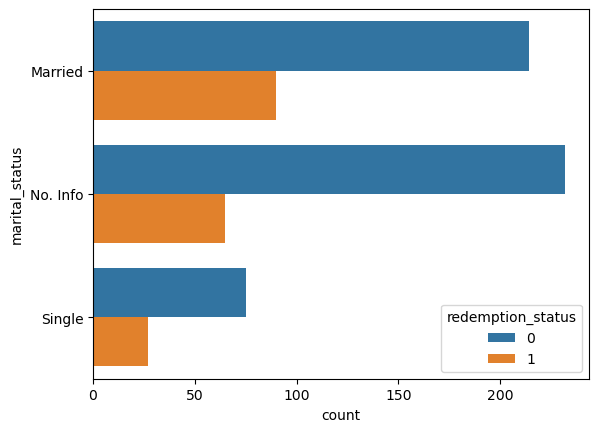

In [30]:
# redemption_status vs marital_status
sns.countplot(y = data2.marital_status, hue = data2.redemption_status, data = data2)
plt.show()

In [31]:
# Age range counts
data2.age_range.value_counts()

46-55    252
36-45    172
26-35    121
70+       62
56-70     56
18-25     40
Name: age_range, dtype: int64

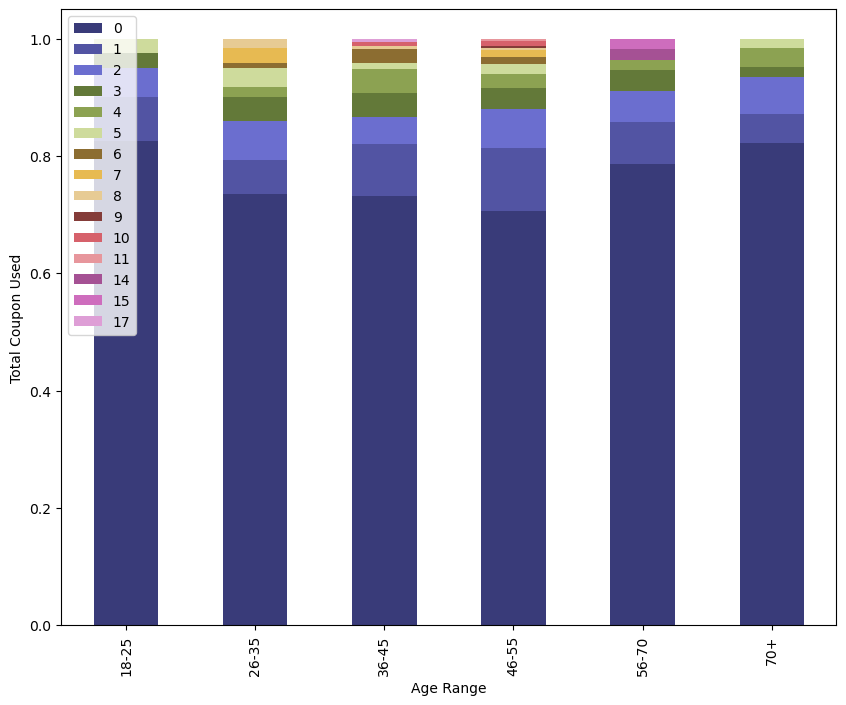

In [32]:
# Relatioships age_range and total_coupon_used
cross_tab = pd.crosstab(index=data2['age_range'], columns=data2['total_coupon_used'],normalize = "index")
cross_tab.plot(kind='bar', stacked=True, colormap='tab20b',figsize=(10,8))

plt.legend(loc="upper left", ncol=1)
plt.xlabel("Age Range")
plt.ylabel("Total Coupon Used")
plt.show()

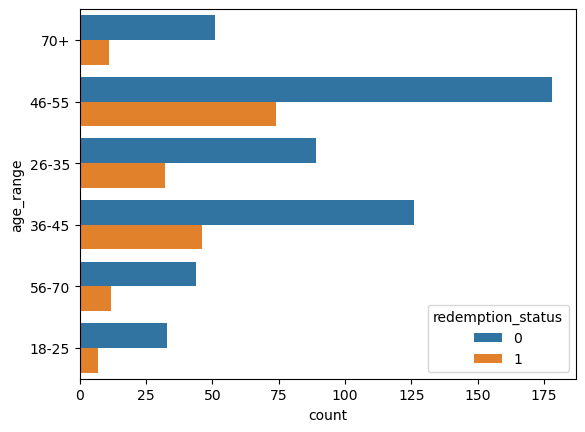

In [33]:
# age_range vs selling_price
sns.countplot(y = data2.age_range, hue = data2.redemption_status, data = data2)
plt.show()       

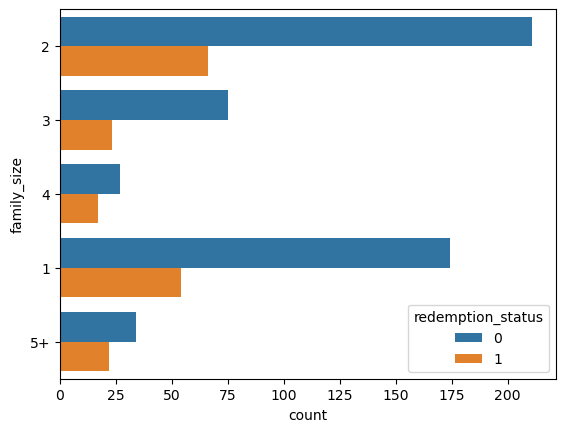

In [34]:
# family_size vs selling_price
sns.countplot(y = data2.family_size, hue = data2.redemption_status, data = data2)
plt.show()

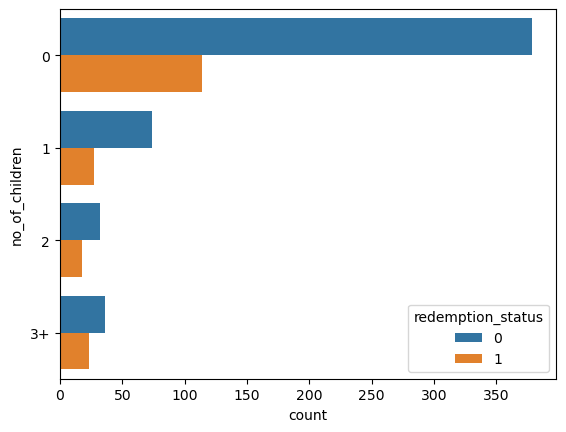

In [35]:
# no_of_children vs selling_price
sns.countplot(y = data2.no_of_children, hue = data2.redemption_status, data = data2)
plt.show()

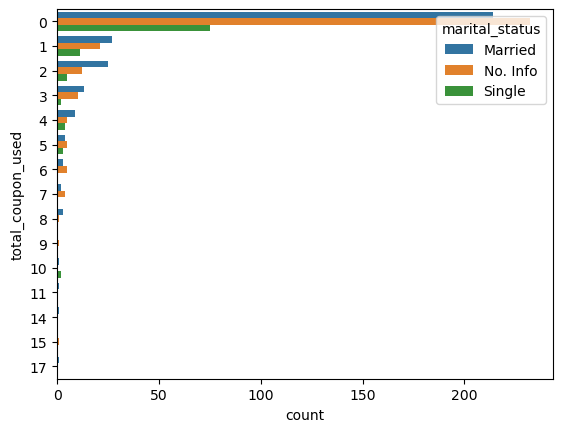

In [36]:
# total_coupon_used vs marital_status
sns.countplot(y = data2.total_coupon_used, hue = data2.marital_status, data = data2)
plt.show()

### Balanceo de los Datos de Train

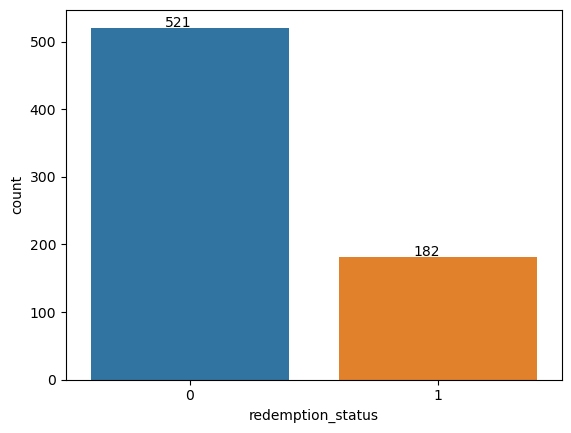

In [37]:
# redemption_status countplot
ax = sns.countplot(x = "redemption_status", data = data2)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1.5))

In [38]:
# class count
class_count_0, class_count_1 = data2['redemption_status'].value_counts()

# Separate class
class_0 = data2[data2['redemption_status'] == 0]
class_1 = data2[data2['redemption_status'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (521, 12)
class 1: (182, 12)


total class of 1 and 0: 0    182
1    182
Name: redemption_status, dtype: int64


<AxesSubplot:>

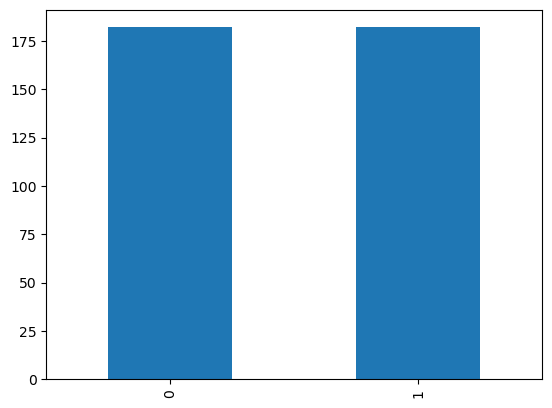

In [40]:
new_train_0 = class_0.sample(class_count_1)

new_train = pd.concat([new_train_0, class_1], axis=0)

print("total class of 1 and 0:",new_train['redemption_status'].value_counts())
# plot the count after under-sampeling
new_train['redemption_status'].value_counts().plot(kind='bar')

In [41]:
new_train_0

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,redemption_status
209,443,70+,No. Info,0,1,0,4,131293,82939.20,-137.13,0,0
287,602,18-25,Married,0,2,0,11,69863,52483.26,0.00,0,0
410,880,56-70,No. Info,0,1,0,2,54547,56230.27,-8.90,0,0
24,48,36-45,Married,0,2,0,3,12143,90185.10,-1237.79,0,0
301,630,26-35,No. Info,0,1,0,4,498,41052.17,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
441,947,46-55,Married,0,2,0,5,480030,157294.87,-222.62,0,0
464,1008,36-45,No. Info,0,2,0,4,234,15887.81,0.00,0,0
369,785,36-45,No. Info,0,3,1,5,1345,100345.08,0.00,0,0
193,400,46-55,No. Info,0,1,0,5,215466,107583.09,-188.79,0,0


In [42]:
class_1

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,redemption_status
0,1,70+,Married,0,2,0,4,1227,98513.93,-2116.83,2,1
2,7,26-35,No. Info,0,3,1,3,57763,107477.03,-785.43,1,1
3,8,26-35,No. Info,0,4,2,6,1334454,299482.15,-6605.29,8,1
6,12,46-55,Married,0,2,0,7,113464,135164.71,-1195.03,3,1
9,15,46-55,Married,0,2,0,6,276922,115717.55,-1307.24,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
694,1552,46-55,Single,0,2,0,3,1164,111299.35,-251.11,1,1
695,1558,36-45,Married,0,3,1,6,45148,276411.52,-8515.60,4,1
697,1573,46-55,Single,0,1,0,4,195931,137584.57,-790.39,3,1
698,1574,36-45,Married,0,2,0,5,155276,243618.73,-11937.80,17,1


In [43]:
new_train

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,redemption_status
209,443,70+,No. Info,0,1,0,4,131293,82939.20,-137.13,0,0
287,602,18-25,Married,0,2,0,11,69863,52483.26,0.00,0,0
410,880,56-70,No. Info,0,1,0,2,54547,56230.27,-8.90,0,0
24,48,36-45,Married,0,2,0,3,12143,90185.10,-1237.79,0,0
301,630,26-35,No. Info,0,1,0,4,498,41052.17,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,1552,46-55,Single,0,2,0,3,1164,111299.35,-251.11,1,1
695,1558,36-45,Married,0,3,1,6,45148,276411.52,-8515.60,4,1
697,1573,46-55,Single,0,1,0,4,195931,137584.57,-790.39,3,1
698,1574,36-45,Married,0,2,0,5,155276,243618.73,-11937.80,17,1


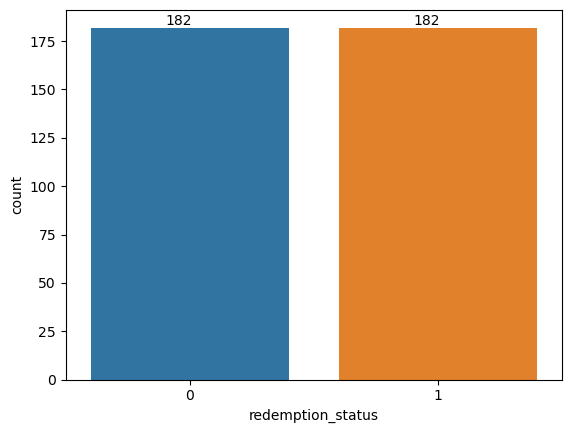

In [44]:
# redemption_status countplot
ax = sns.countplot(x = "redemption_status", data = new_train)
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+1.5))

### Dummies

In [45]:
new_train

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,redemption_status
209,443,70+,No. Info,0,1,0,4,131293,82939.20,-137.13,0,0
287,602,18-25,Married,0,2,0,11,69863,52483.26,0.00,0,0
410,880,56-70,No. Info,0,1,0,2,54547,56230.27,-8.90,0,0
24,48,36-45,Married,0,2,0,3,12143,90185.10,-1237.79,0,0
301,630,26-35,No. Info,0,1,0,4,498,41052.17,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,1552,46-55,Single,0,2,0,3,1164,111299.35,-251.11,1,1
695,1558,36-45,Married,0,3,1,6,45148,276411.52,-8515.60,4,1
697,1573,46-55,Single,0,1,0,4,195931,137584.57,-790.39,3,1
698,1574,36-45,Married,0,2,0,5,155276,243618.73,-11937.80,17,1


In [46]:
# Resetear index
new_train=new_train.reset_index()
new_train

,index,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,redemption_status
0,209,443,70+,No. Info,0,1,0,4,131293,82939.20,-137.13,0,0
1,287,602,18-25,Married,0,2,0,11,69863,52483.26,0.00,0,0
2,410,880,56-70,No. Info,0,1,0,2,54547,56230.27,-8.90,0,0
3,24,48,36-45,Married,0,2,0,3,12143,90185.10,-1237.79,0,0
4,301,630,26-35,No. Info,0,1,0,4,498,41052.17,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,694,1552,46-55,Single,0,2,0,3,1164,111299.35,-251.11,1,1
360,695,1558,36-45,Married,0,3,1,6,45148,276411.52,-8515.60,4,1
361,697,1573,46-55,Single,0,1,0,4,195931,137584.57,-790.39,3,1
362,698,1574,36-45,Married,0,2,0,5,155276,243618.73,-11937.80,17,1


In [47]:
new_train=new_train.drop(['index'], axis = 1)
new_train

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,redemption_status
0,443,70+,No. Info,0,1,0,4,131293,82939.20,-137.13,0,0
1,602,18-25,Married,0,2,0,11,69863,52483.26,0.00,0,0
2,880,56-70,No. Info,0,1,0,2,54547,56230.27,-8.90,0,0
3,48,36-45,Married,0,2,0,3,12143,90185.10,-1237.79,0,0
4,630,26-35,No. Info,0,1,0,4,498,41052.17,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359,1552,46-55,Single,0,2,0,3,1164,111299.35,-251.11,1,1
360,1558,36-45,Married,0,3,1,6,45148,276411.52,-8515.60,4,1
361,1573,46-55,Single,0,1,0,4,195931,137584.57,-790.39,3,1
362,1574,36-45,Married,0,2,0,5,155276,243618.73,-11937.80,17,1


In [48]:
new_train_2=pd.get_dummies(new_train,columns=['marital_status', 'rented','redemption_status'],drop_first=True)
new_train_2.columns

Index(['customer_id', 'age_range', 'family_size', 'no_of_children',
       'income_bracket', 'quantity', 'selling_price', 'coupon_discount',
       'total_coupon_used', 'marital_status_No. Info', 'marital_status_Single',
       'rented_1', 'redemption_status_1'],
      dtype='object')

In [49]:
new_train_2

,customer_id,age_range,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1,redemption_status_1
0,443,70+,1,0,4,131293,82939.20,-137.13,0,1,0,0,0
1,602,18-25,2,0,11,69863,52483.26,0.00,0,0,0,0,0
2,880,56-70,1,0,2,54547,56230.27,-8.90,0,1,0,0,0
3,48,36-45,2,0,3,12143,90185.10,-1237.79,0,0,0,0,0
4,630,26-35,1,0,4,498,41052.17,0.00,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1552,46-55,2,0,3,1164,111299.35,-251.11,1,0,1,0,1
360,1558,36-45,3,1,6,45148,276411.52,-8515.60,4,0,0,0,1
361,1573,46-55,1,0,4,195931,137584.57,-790.39,3,0,1,0,1
362,1574,36-45,2,0,5,155276,243618.73,-11937.80,17,0,0,0,1


In [50]:
new_train_3 = new_train_2.copy()
new_train_3

,customer_id,age_range,family_size,no_of_children,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1,redemption_status_1
0,443,70+,1,0,4,131293,82939.20,-137.13,0,1,0,0,0
1,602,18-25,2,0,11,69863,52483.26,0.00,0,0,0,0,0
2,880,56-70,1,0,2,54547,56230.27,-8.90,0,1,0,0,0
3,48,36-45,2,0,3,12143,90185.10,-1237.79,0,0,0,0,0
4,630,26-35,1,0,4,498,41052.17,0.00,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1552,46-55,2,0,3,1164,111299.35,-251.11,1,0,1,0,1
360,1558,36-45,3,1,6,45148,276411.52,-8515.60,4,0,0,0,1
361,1573,46-55,1,0,4,195931,137584.57,-790.39,3,0,1,0,1
362,1574,36-45,2,0,5,155276,243618.73,-11937.80,17,0,0,0,1


In [51]:
new_train_3=new_train_3.drop(['age_range','family_size','no_of_children'], axis = 1)
new_train_3.columns

Index(['customer_id', 'income_bracket', 'quantity', 'selling_price',
       'coupon_discount', 'total_coupon_used', 'marital_status_No. Info',
       'marital_status_Single', 'rented_1', 'redemption_status_1'],
      dtype='object')

In [52]:
new_train_3

,customer_id,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1,redemption_status_1
0,443,4,131293,82939.20,-137.13,0,1,0,0,0
1,602,11,69863,52483.26,0.00,0,0,0,0,0
2,880,2,54547,56230.27,-8.90,0,1,0,0,0
3,48,3,12143,90185.10,-1237.79,0,0,0,0,0
4,630,4,498,41052.17,0.00,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
359,1552,3,1164,111299.35,-251.11,1,0,1,0,1
360,1558,6,45148,276411.52,-8515.60,4,0,0,0,1
361,1573,4,195931,137584.57,-790.39,3,0,1,0,1
362,1574,5,155276,243618.73,-11937.80,17,0,0,0,1


### Definición de las x & y

In [156]:
X_train = new_train_3.copy()
X_train

,customer_id,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1,redemption_status_1
0,443,4,131293,82939.20,-137.13,0,1,0,0,0
1,602,11,69863,52483.26,0.00,0,0,0,0,0
2,880,2,54547,56230.27,-8.90,0,1,0,0,0
3,48,3,12143,90185.10,-1237.79,0,0,0,0,0
4,630,4,498,41052.17,0.00,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
359,1552,3,1164,111299.35,-251.11,1,0,1,0,1
360,1558,6,45148,276411.52,-8515.60,4,0,0,0,1
361,1573,4,195931,137584.57,-790.39,3,0,1,0,1
362,1574,5,155276,243618.73,-11937.80,17,0,0,0,1


In [157]:
X_train

,customer_id,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1,redemption_status_1
0,443,4,131293,82939.20,-137.13,0,1,0,0,0
1,602,11,69863,52483.26,0.00,0,0,0,0,0
2,880,2,54547,56230.27,-8.90,0,1,0,0,0
3,48,3,12143,90185.10,-1237.79,0,0,0,0,0
4,630,4,498,41052.17,0.00,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
359,1552,3,1164,111299.35,-251.11,1,0,1,0,1
360,1558,6,45148,276411.52,-8515.60,4,0,0,0,1
361,1573,4,195931,137584.57,-790.39,3,0,1,0,1
362,1574,5,155276,243618.73,-11937.80,17,0,0,0,1


In [158]:
y_train = new_train_2.redemption_status_1.copy()
y_train

0      0
1      0
2      0
3      0
4      0
      ..
359    1
360    1
361    1
362    1
363    1
Name: redemption_status_1, Length: 364, dtype: uint8

In [159]:
# Importar data: test
X_test = pd.read_csv("test.csv")
X_test

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811
...,...,...,...,...
50221,128584,20,843,501
50222,128588,25,415,481
50223,128591,25,596,1336
50224,128593,22,518,748


In [160]:
# Hacer un merge de customer_demographics y data1 data con el customer id.
X_test = pd.merge(X_train, X_test,how="inner", on=["customer_id"])
X_test

,customer_id,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1,redemption_status_1,id,campaign_id,coupon_id
0,443,4,131293,82939.20,-137.13,0,1,0,0,0,12118,18,232
1,443,4,131293,82939.20,-137.13,0,1,0,0,0,13369,18,765
2,443,4,131293,82939.20,-137.13,0,1,0,0,0,26889,18,657
3,443,4,131293,82939.20,-137.13,0,1,0,0,0,27390,18,245
4,443,4,131293,82939.20,-137.13,0,1,0,0,0,30088,18,892
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16491,1578,6,107107,82019.46,-767.62,2,0,0,0,1,110484,18,205
16492,1578,6,107107,82019.46,-767.62,2,0,0,0,1,114477,18,217
16493,1578,6,107107,82019.46,-767.62,2,0,0,0,1,119705,17,981
16494,1578,6,107107,82019.46,-767.62,2,0,0,0,1,120041,18,31


In [161]:
X_train=X_train.drop(['customer_id','redemption_status_1'], axis = 1)
X_train.columns

Index(['income_bracket', 'quantity', 'selling_price', 'coupon_discount',
       'total_coupon_used', 'marital_status_No. Info', 'marital_status_Single',
       'rented_1'],
      dtype='object')

In [162]:
X_train

,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1
0,4,131293,82939.20,-137.13,0,1,0,0
1,11,69863,52483.26,0.00,0,0,0,0
2,2,54547,56230.27,-8.90,0,1,0,0
3,3,12143,90185.10,-1237.79,0,0,0,0
4,4,498,41052.17,0.00,0,1,0,0
...,...,...,...,...,...,...,...,...
359,3,1164,111299.35,-251.11,1,0,1,0
360,6,45148,276411.52,-8515.60,4,0,0,0
361,4,195931,137584.57,-790.39,3,0,1,0
362,5,155276,243618.73,-11937.80,17,0,0,0


In [163]:
X_test=X_test.drop(['customer_id','id','campaign_id','coupon_id'], axis = 1)
X_test.columns

Index(['income_bracket', 'quantity', 'selling_price', 'coupon_discount',
       'total_coupon_used', 'marital_status_No. Info', 'marital_status_Single',
       'rented_1', 'redemption_status_1'],
      dtype='object')

In [164]:
X_test

,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1,redemption_status_1
0,4,131293,82939.20,-137.13,0,1,0,0,0
1,4,131293,82939.20,-137.13,0,1,0,0,0
2,4,131293,82939.20,-137.13,0,1,0,0,0
3,4,131293,82939.20,-137.13,0,1,0,0,0
4,4,131293,82939.20,-137.13,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
16491,6,107107,82019.46,-767.62,2,0,0,0,1
16492,6,107107,82019.46,-767.62,2,0,0,0,1
16493,6,107107,82019.46,-767.62,2,0,0,0,1
16494,6,107107,82019.46,-767.62,2,0,0,0,1


In [165]:
# Verificar valores NaN
X_test.isnull().sum()

income_bracket             0
quantity                   0
selling_price              0
coupon_discount            0
total_coupon_used          0
marital_status_No. Info    0
marital_status_Single      0
rented_1                   0
redemption_status_1        0
dtype: int64

In [166]:
y_test = X_test.redemption_status_1.copy()
y_test

0        0
1        0
2        0
3        0
4        0
        ..
16491    1
16492    1
16493    1
16494    1
16495    1
Name: redemption_status_1, Length: 16496, dtype: uint8

In [167]:
X_test1 = X_test.copy()
X_test1

,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1,redemption_status_1
0,4,131293,82939.20,-137.13,0,1,0,0,0
1,4,131293,82939.20,-137.13,0,1,0,0,0
2,4,131293,82939.20,-137.13,0,1,0,0,0
3,4,131293,82939.20,-137.13,0,1,0,0,0
4,4,131293,82939.20,-137.13,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
16491,6,107107,82019.46,-767.62,2,0,0,0,1
16492,6,107107,82019.46,-767.62,2,0,0,0,1
16493,6,107107,82019.46,-767.62,2,0,0,0,1
16494,6,107107,82019.46,-767.62,2,0,0,0,1


In [168]:
X_test1=X_test1.drop(['redemption_status_1'], axis = 1)
X_test1.columns

Index(['income_bracket', 'quantity', 'selling_price', 'coupon_discount',
       'total_coupon_used', 'marital_status_No. Info', 'marital_status_Single',
       'rented_1'],
      dtype='object')

In [169]:
X_test1

,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1
0,4,131293,82939.20,-137.13,0,1,0,0
1,4,131293,82939.20,-137.13,0,1,0,0
2,4,131293,82939.20,-137.13,0,1,0,0
3,4,131293,82939.20,-137.13,0,1,0,0
4,4,131293,82939.20,-137.13,0,1,0,0
...,...,...,...,...,...,...,...,...
16491,6,107107,82019.46,-767.62,2,0,0,0
16492,6,107107,82019.46,-767.62,2,0,0,0
16493,6,107107,82019.46,-767.62,2,0,0,0
16494,6,107107,82019.46,-767.62,2,0,0,0


### Split en train y test

In [474]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_train_3.drop(['redemption_status_1'], axis=1), new_train_3.redemption_status_1, test_size=0.4, random_state=109)

In [475]:
X_test2

,customer_id,income_bracket,quantity,selling_price,coupon_discount,total_coupon_used,marital_status_No. Info,marital_status_Single,rented_1
142,525,9,1312,107185.14,-242.93,0,0,0,0
277,897,4,206,12223.30,-847.73,1,0,1,1
175,1473,5,2566,240891.05,-97.95,0,1,0,0
254,684,3,1076,64738.76,-705.62,1,1,0,0
263,792,4,21446,114492.60,-442.76,2,0,0,0
...,...,...,...,...,...,...,...,...,...
274,876,9,895,97683.03,-288.52,2,0,1,0
235,510,1,181500,161811.27,-2384.75,7,1,0,0
242,566,5,736033,307490.77,-6237.36,8,0,0,0
302,1115,3,115978,201757.56,-3593.63,7,1,0,0


In [145]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test1)

### Machine Learning Model

#### Support Vector Classifier - rbf

In [182]:
tuned_parameters = [{"kernel": ["rbf"], "gamma":[0.1, 0.01, 0.001, 0.0001,0.00001,0.000001,0.00000001], "C": [0.001,0.01,0.1,0.2,0.5,1,1.1,2.5,5,10,25,50,50.5,50.2,51,52,53,70,80,100,1000]},]


grid_rbf = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
grid_rbf.fit(X_train,y_train)

grid_rbf.best_params_

{'C': 2.5, 'gamma': 1e-06, 'kernel': 'rbf'}

In [183]:
grid_rbf.best_score_

0.7053162991187427

In [184]:
# Creating SVM Model classifier
svm_rbf = svm.SVC(kernel="rbf", probability=True,C = 2.5, gamma = 0.000001)
# Train the model
svm_rbf.fit(X_train,y_train)

SVC(C=2.5, gamma=1e-06, probability=True)

In [185]:
# Predict the response
pred_rbf = svm_rbf.predict(X_test1)
pred_rbf[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [186]:
pred_rbf

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [187]:
cm_rbf = confusion_matrix(y_test, pred_rbf)
pd.DataFrame(cm_rbf, columns=['No','Yes'],index=["No","Yes"])

,No,Yes
No,6555,0
Yes,0,9941


In [188]:
acctest_rbf = round((cm_rbf[0,0]+cm_rbf[1,1])/(np.sum(cm_rbf)),3)
acctest_rbf

1.0

In [189]:
f1_rbf = round(f1_score(y_test, pred_rbf),3)
f1_rbf 

1.0

In [190]:
senstest_rbf = round(cm_rbf[1,1]/(cm_rbf[1,1]+cm_rbf[1,0]),3)
senstest_rbf

1.0

In [191]:
spectest_rbf = round(cm_rbf[0,0]/(cm_rbf[0,0]+cm_rbf[0,1]),3)
spectest_rbf

1.0

In [192]:
auc_rbf = round(metrics.roc_auc_score(y_test, pred_rbf),3)
auc_rbf

1.0

#### SVM Classifier with Sigmoid Kernel

In [193]:
tuned_parameters = [{"kernel": ["sigmoid"], "gamma":[0.1, 0.01, 0.001, 0.0001], 'C':[0.01,0.1,0.2,0.5,1,1.3,1.5,3], "coef0":[0.1,0.2,0.5,1,5]}]


grid_sig = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
grid_sig.fit(X_train,y_train)

grid_sig.best_params_

{'C': 0.01, 'coef0': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}

In [194]:
grid_sig.best_score_

0.39755351681957185

In [195]:
# Create a Classifer
svm_sig = svm.SVC(kernel="sigmoid", C = 0.01, gamma = 0.1, coef0=0.1, probability=True)
# Train the model
svm_sig.fit(X_train,y_train)

SVC(C=0.01, coef0=0.1, gamma=0.1, kernel='sigmoid', probability=True)

In [196]:
# Predict the response
pred_sig = svm_sig.predict(X_test1)
pred_sig[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [197]:
pred_sig

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [198]:
cm_sig = confusion_matrix(y_test, pred_sig)
pd.DataFrame(cm_sig, columns=['No','Yes'],index=["No","Yes"])

,No,Yes
No,0,6555
Yes,0,9941


In [199]:
acctest_sig = round((cm_sig[0,0]+cm_sig[1,1])/(np.sum(cm_sig)),3)
acctest_sig

0.603

In [201]:
f1_sig = round(f1_score(y_test, pred_sig),3)
f1_sig 

0.752

In [203]:
auc_sig = round(metrics.roc_auc_score(y_test, pred_sig),3)
auc_sig

0.5

In [204]:
senstest_sig = round(cm_sig[1,1]/(cm_sig[1,1]+cm_sig[1,0]),3)
senstest_sig

1.0

In [205]:
spectest_sig = round(cm_sig[0,0]/(cm_sig[0,0]+cm_sig[0,1]),3)
spectest_sig

0.0

#### Random Forest Classifier

In [206]:
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = [{'max_depth':[0.5,0.9,1,2,3,5,10,15],"n_estimators":[1,5,10,30,35,40,45,48,50],'max_leaf_nodes':[0.5,1,2,3,3.5,5,25,50]}]

grid_rf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1')
grid_rf.fit(X_train,y_train)

grid_rf.best_params_

C:\Users\Alejandra Galindo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1080 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Alejandra Galindo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Alejandra Galindo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Alejandra Galindo\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):


{'max_depth': 2, 'max_leaf_nodes': 3, 'n_estimators': 30}

In [207]:
grid_rf.best_score_

1.0

In [208]:
# Create a classifier
rf = RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=30)
# Train the model
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=30)

In [209]:
# Predict the response
pred_rf = rf.predict(X_test1)
pred_rf[0:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [210]:
pred_rf

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [211]:
cm_rf = confusion_matrix(y_test, pred_rf)
pd.DataFrame(cm_rf, columns=['No','Yes'],index=["No","Yes"])

,No,Yes
No,6555,0
Yes,0,9941


In [212]:
acctest_rf = round((cm_rf[0,0]+cm_rf[1,1])/(np.sum(cm_rf)),3)
acctest_rf

1.0

In [213]:
f1_rf = round(f1_score(y_test, pred_rf),3)
f1_rf

1.0

In [214]:
auc_rf = round(metrics.roc_auc_score(y_test, pred_rf),3)
auc_rf

1.0

In [215]:
senstest_rf = round(cm_rf[1,1]/(cm_rf[1,1]+cm_rf[1,0]),3)
senstest_rf

1.0

In [216]:
spectest_rf = round(cm_rf[0,0]/(cm_rf[0,0]+cm_rf[0,1]),3)
spectest_rf

1.0

### Kernel Comparison

In [217]:
results=pd.DataFrame(np.array([acctest_rbf,acctest_sig,acctest_rf,auc_rbf,auc_sig,auc_rf,f1_rbf, f1_sig, f1_rf,senstest_rbf,senstest_sig,senstest_rf,spectest_rbf,spectest_sig,spectest_rf]).reshape(5,3),columns=["SVC_RBF","SVC_Sigmoid","RandomForest"],index=["Accuracy","ROC_AUC","F1_score","Sensitivity","Specificity"])
results=results.astype({"SVC_RBF":float})
results=results.astype({"SVC_Sigmoid":float})
results=results.astype({"RandomForest":float})
results

,SVC_RBF,SVC_Sigmoid,RandomForest
Accuracy,1.0,0.603,1.0
ROC_AUC,1.0,0.500,1.0
F1_score,1.0,0.752,1.0
Sensitivity,1.0,1.000,1.0
Specificity,1.0,0.000,1.0


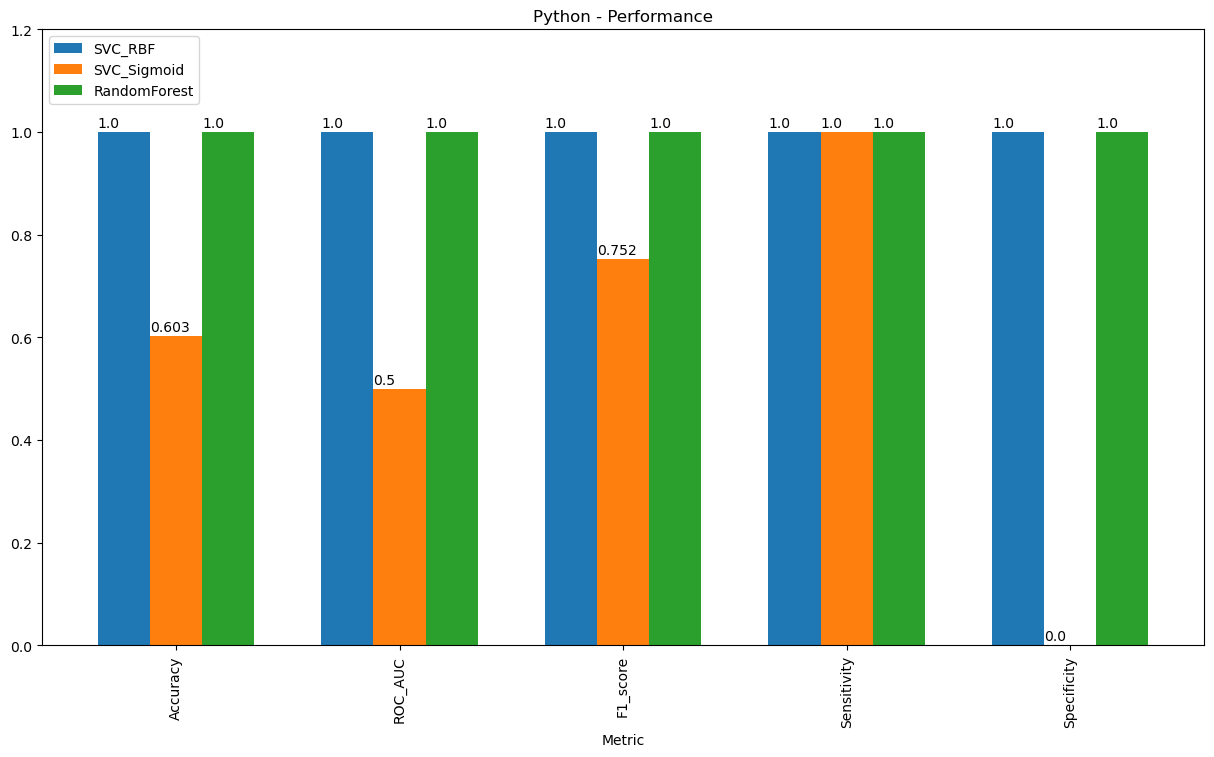

In [218]:
ax=results.plot(kind="bar",width=.7,figsize=(15,8))
plt.title("Python - Performance")
plt.xlabel("Metric")
plt.legend(loc='upper left')
plt.ylim(0,1.2)

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+.01))